# 2023-2 언어데이터과학 [숙제05] Word Cloud

제출 기한: 2023-10-16 오후 1:00

## 목표

*De re coquinaria* 텍스트에서 자주 쓰인 단어들을 단어구름(word cloud)으로 시각화한다.

## 0. 준비: 모듈 설치

In [11]:
#vscode에서 pip에 관한 오류가 발생하여 colab에서 진행하였습니다.
%pip install -U pip
%pip install -U wordcloud # 단어구름
%pip install -U nltk # natulral language toolkit

## 1. 예제: *Twinkle Twinkle Little Star*

### 텍스트 데이터 구성하기

텍스트가 주로 어떤 단어로 이루어져 있는지를 단어구름으로 시각화하고자 한다.

먼저 텍스트 문자열 `words`에 `str.split()` 메소드를 적용하여 단어의 리스트로 변환하자.

In [25]:
words = '''\
twinkle twinkle little star
how i wonder what you are
up above the world so high
like a diamond in the sky
twinkle twinkle little star
how i wonder what you are\
'''.split()

print(words)

['twinkle', 'twinkle', 'little', 'star', 'how', 'i', 'wonder', 'what', 'you', 'are', 'up', 'above', 'the', 'world', 'so', 'high', 'like', 'a', 'diamond', 'in', 'the', 'sky', 'twinkle', 'twinkle', 'little', 'star', 'how', 'i', 'wonder', 'what', 'you', 'are']


텍스트가 띄어쓰기를 기준으로 단어 단위로 분리되고 각각의 단어를 원소로 하는 리스트 `words`가 만들어졌다.

이 리스트를 재료로 단어구름 그리기에 필요한 과정을 진행할 수 있다.

### 단어 카운터 만들기

텍스트 내에서 각 단어가 몇 번 사용되었는지를 계산해 보자.

단어들의 리스트 `words`를 `collections.Counter` 자료형의 인자로 넣으면, 단어를 key, 사용 빈도를 value로 하는 딕셔너리와 같은 객체를 얻을 수 있다.

In [13]:
from collections import Counter

mycounter = Counter(words)

print(mycounter)

Counter({'twinkle': 4, 'little': 2, 'star': 2, 'how': 2, 'i': 2, 'wonder': 2, 'what': 2, 'you': 2, 'are': 2, 'the': 2, 'up': 1, 'above': 1, 'world': 1, 'so': 1, 'high': 1, 'like': 1, 'a': 1, 'diamond': 1, 'in': 1, 'sky': 1})


가장 자주 나온 'twinkle'의 사용 빈도가 4회, 다음으로 'little', 'star', 'how', 'i' 등의 단어가 각 2회 출현했다는 것을 알 수 있다.

### 단어구름 그리기

`Counter` 자료형의 객체가 있으면 단어구름을 그릴 수 있는 통계 자료가 갖추어졌다.

이제 `wordcloud` 모듈의 `WordCloud` 클래스를 사용하여 단어구름 객체를 만들 수 있다.

다음으로 `matplotlib.pyplot` 모듈을 통해 이 객체를 이미지로 출력할 수 있다.

아래의 코드를 살펴보자.

In [15]:
from wordcloud import WordCloud # 단어구름 객체를 만드는 모듈
import matplotlib.pyplot as plt # 일반적인 그림을 그리는 모듈 (cf. seaborn: 데이터프레임 전제)

def plot(counter:Counter):
  wc = WordCloud(width=600, height=600, colormap='Accent')
  gen = wc.generate_from_frequencies(counter)
  plt.imshow(gen) # 그림을 화면에 보이도록 하는 명령


위 코드 셀에서는 `Counter` 자료형의 객체를 인자로 받아 화면에 그림을 출력하는 함수 `plot()`을 정의한다.

먼저 `WordCloud(width=600, height=600, colormap='Accent')`를 통해 `WordCloud` 객체를 초기화한다.

초기화된 객체 `wc`에서 `generate_from_frequencies()` 메소드를 사용하면 단어구름이 생성된다.

마지막으로 `matplotlib.pyplot` 모듈의 `imshow()` 함수를 통해 생성된 단어구름을 화면에 출력한다.

아래의 코드를 실행해서 출력되는 결과를 살펴보자.

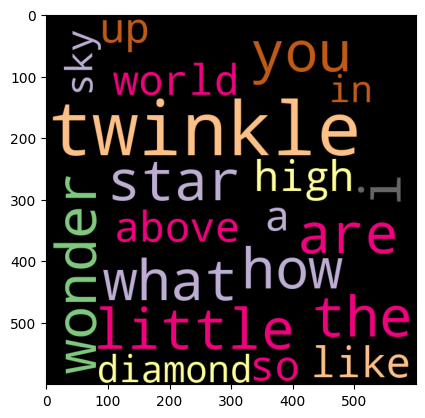

In [16]:
plot(mycounter)

위 그림을 살펴보면 가장 자주 나왔던 'twinkle'이 가장 큰 글자로 출력되었고, 'in', 'sky' 등 1번만 쓰인 단어는 그보다 작은 글자로 출력되었음을 알 수 있다.

## 2. 과제: *De re coquinaria*

### 데이터

이 과제에서는 4강 실습 결과로 산출된 `data/apicius/recipes/*.txt` 파일들을 데이터로 사용한다.

In [22]:
!mkdir -p data
!mkdir -p data/apicius
!cd data/apicius
!wget https://www.gutenberg.org/files/29728/29728-0.txt -O book.txt
!head -13694 book.txt | tail +2868 > recipes.txt
!cd ../..

--2023-10-15 23:07:43--  https://www.gutenberg.org/files/29728/29728-0.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 718740 (702K) [text/plain]
Saving to: ‘book.txt’

book.txt            100%[===================>] 701.89K  3.58MB/s    in 0.2s    

2023-10-15 23:07:43 (3.58 MB/s) - ‘book.txt’ saved [718740/718740]



### [Q1] 단어 빈도 표 만들기 (1점)

앞서 3–4강을 통해 이 텍스트 내의 단어 빈도를 계산한 적 있다.

이 데이터에서는 '단어'를 영어 대문자 3개 이상의 연쇄로 정의하자.

레시피 본문(제목 제외)에 사용된 단어를 빈도순으로 정렬하여 `word-freq.txt`라는 파일로 저장할 수 있도록 아래 코드를 완성하고 실행하라.

In [1]:
!egrep -o "[A-Z][A-Z][A-Z]+" recipes.txt | sort | uniq -c | sort -nr > word-freq.txt

'egrep'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


작성한 코드를 테스트했을 때 아래와 같은 결과가 출력되면 잘 된 것이다.

In [24]:
!head -5 word-freq.txt

   1265 AND
   1016 THE
    727 WITH
    467 PEPPER
    401 BROTH


### [Q2] 단어 카운터 만들기 (2점)

이제 [Q1]에서 만든 `word-freq.txt` 파일을 파이썬의 `Counter` 객체로 가져와 보자.


> `Counter({'AND": 1194, 'THE': 974, 'WITH': 688, 'PEPPER': 456, 'BROTH': 383, ...})`

위와 같은 카운터 객체 `counter_all`를 만들 수 있도록 아래 셀에서 파이썬 코드를 작성하고 실행하라.

In [34]:
with open('word-freq.txt') as f:
    lines = [line.strip().split() for line in f]
    counter_all = Counter({line[1]: int(line[0]) for line in lines[0:]})


작성한 코드를 테스트했을 때 아래와 같은 결과가 나오면 된다.

In [35]:
print(counter_all.most_common(5))

[('AND', 1265), ('THE', 1016), ('WITH', 727), ('PEPPER', 467), ('BROTH', 401)]


### 단어구름 그리기

[Q2]에서 만든 카운터로 단어구름을 그리자.

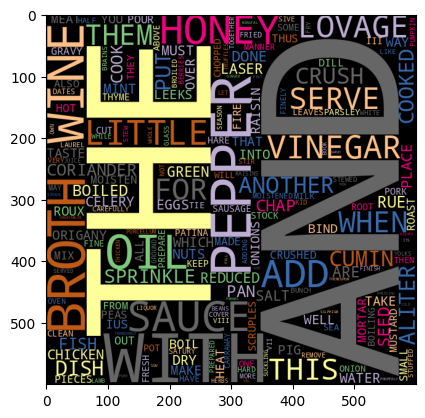

In [36]:
plot(counter_all)

### 불용어(stopword) 설정하기

위의 단어구름을 살펴보면 'THE', 'AND', 'WITH'가 가장 크게 나온다.

실질적인 의미를 가지는 단어인 'PEPPER', 'BROTH' 등은 상대적으로 작은 크기로 출력된다.

이런 경우 텍스트의 특성을 적절히 시각화했다고 보기 어렵다.

'THE' 등 텍스트의 내용과 무관하게 자주 나타나는 단어를 불용어(stopword)라고 한다.

Natural Language ToolKit `nltk` 모듈에서 영어의 불용어 목록을 제공하므로 이를 활용하자.

In [37]:
import nltk
nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


영어의 불용어 목록을 `stopword_list`라는 리스트 객체로 저장하였다.

In [38]:
print(stopword_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

위의 목록에서 'i', 'me', 'my', 등의 기능어를 주로 포함하는 것을 확인할 수 있다.

### [Q3] 불용어 제거하기 (2점)

이제 [Q2]에서 만든 카운터를 개선하기 위해 불용어를 제거하고자 한다.

`counter_all`에서 불용어 키워드를 모두 제거한 카운터 객체 `counter_content`를 만드는 코드를 아래 셀에서 작성하라.

In [57]:

counter_content = Counter({line[1]: int(line[0]) for line in lines[0:] if line[1].lower() not in stopword_list})


작성한 코드를 테스트했을 때 아래와 같은 결과가 출력되면 잘 된 것이다.

In [58]:
print(counter_content.most_common(5))

[('PEPPER', 467), ('BROTH', 401), ('WINE', 376), ('OIL', 339), ('SAUCE', 247)]


새로운 카운터를 바탕으로 단어구름을 그려 보자.

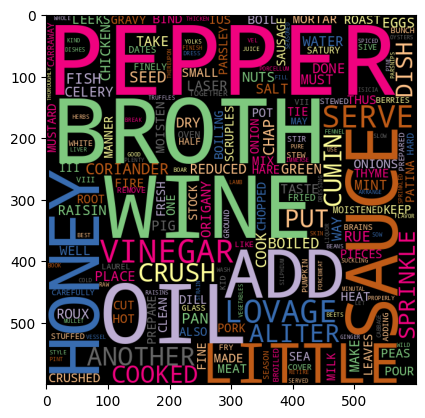

In [59]:
plot(counter_content)

'AND', 'THE', 'WITH' 등의 기능어가 대부분 제거되고 'PEPPER', 'BROTH', 'WINE', 'OIL', 'HONEY' 등 자주 쓰인 재료가 큰 글자로 표시되는 것을 확인할 수 있다.